<a href="https://colab.research.google.com/github/YazCodes/Deep-Learning-projects/blob/main/Prediction2_CatvsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Images of dogs and cats using a CNN

In [12]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras

In [13]:
#location of zip

# extract the training data into a directory
local_zip = '/content/drive/MyDrive/dogs-vs-cats-vvsmall.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('//content/drive/MyDrive/dogs-vs-cats-vvsmall')


In [14]:
base_dir = '/content/drive/MyDrive/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#directory with out training cat pictutes
train_cats_dir = os.path.join(train_dir, 'cats')

#directory with out training dog pictutes
train_dogs_dir = os.path.join(train_dir, 'dogs')

#directory with out validation cat pictutes
validation_cats_dir = os.path.join(validation_dir, 'cats')

#directory with out validation dog pictutes
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [16]:
#exploring the data 
# print out the names of the first 10 files to give a nice feeling that the files are arranged as expected
# i.e. images of cats in the cats folder and images of dogs in the dogs folder
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg']
['cat.8500.jpg', 'cat.8501.jpg', 'cat.8502.jpg', 'cat.8503.jpg', 'cat.8504.jpg', 'cat.8505.jpg', 'cat.8506.jpg', 'cat.8507.jpg', 'cat.8508.jpg', 'cat.8509.jpg']
['dog.8500.jpg', 'dog.8501.jpg', 'dog.8502.jpg', 'dog.8503.jpg', 'dog.8504.jpg', 'dog.8505.jpg', 'dog.8506.jpg', 'dog.8507.jpg', 'dog.8508.jpg', 'dog.8509.jpg']


In [17]:
# print out the number of images in the directories
# print out the number of images in the directories
print('total training cats images:', len(os.listdir(train_cats_dir)))
print('total training dogs images:', len(os.listdir(train_dogs_dir)))

print('total validation cats images:', len(os.listdir(validation_cats_dir)))
print('total validation dogs images:', len(os.listdir(validation_dogs_dir)))


total training cats images: 3000
total training dogs images: 3000
total validation cats images: 900
total validation dogs images: 900


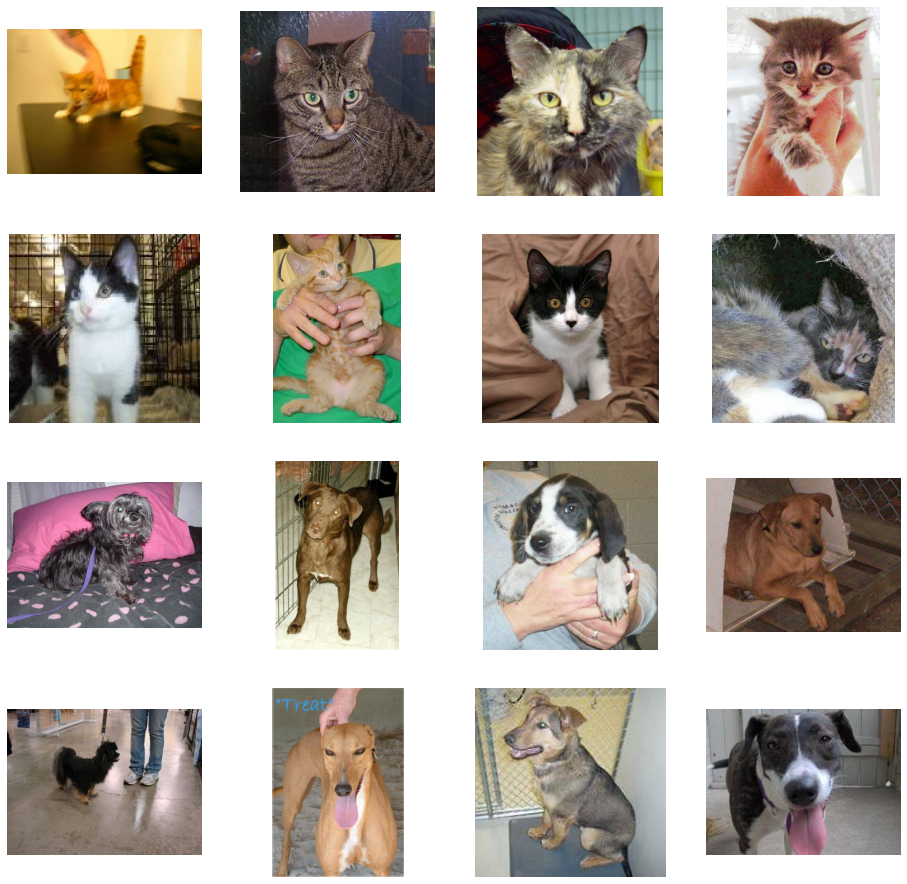

In [18]:
# display images from the dataset
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
# pick the first 8 cat pictures
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_names[pic_index-8:pic_index]]
# pick the first 8 dog pictures
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_names[pic_index-8:pic_index]]

# add the dog and cat pictures together in a list and plot in
# the specified number of rows and columns
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') 
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

Data preperation 

In [19]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/dogs-vs-cats-vvsmall/dogs-vs-cats-vvsmall/validation',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )             

Epoch 1/15
188/188 [==============================] - 543s 3s/step - loss: 0.6955 - accuracy: 0.4855 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/15
188/188 [==============================] - 534s 3s/step - loss: 0.6939 - accuracy: 0.5140 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 3/15
188/188 [==============================] - 526s 3s/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 4/15
188/188 [==============================] - 523s 3s/step - loss: 0.6887 - accuracy: 0.5157 - val_loss: 0.6734 - val_accuracy: 0.5789
Epoch 5/15
188/188 [==============================] - 524s 3s/step - loss: 0.6620 - accuracy: 0.5917 - val_loss: 0.6435 - val_accuracy: 0.6222
Epoch 6/15
188/188 [==============================] - 522s 3s/step - loss: 0.6450 - accuracy: 0.6017 - val_loss: 0.6444 - val_accuracy: 0.6117
Epoch 7/15
188/188 [==============================] - 523s 3s/step - loss: 0.6210 - accuracy: 0.6329 - val_loss: 0.6124 - val_accuracy: 0.6578

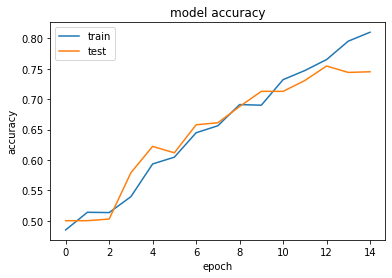

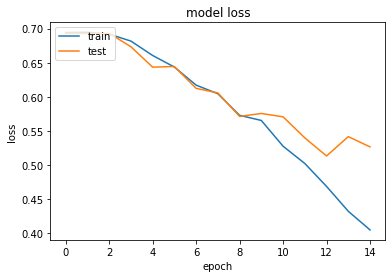

In [23]:
# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()